In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path = "DATASET-balanced.csv/DATASET-balanced.csv"
data = pd.read_csv(path)
data['LABEL'] = data['LABEL'].map({"REAL":1,"FAKE":0})
data.shape

(11778, 27)

In [7]:
data.shape

(11778, 27)

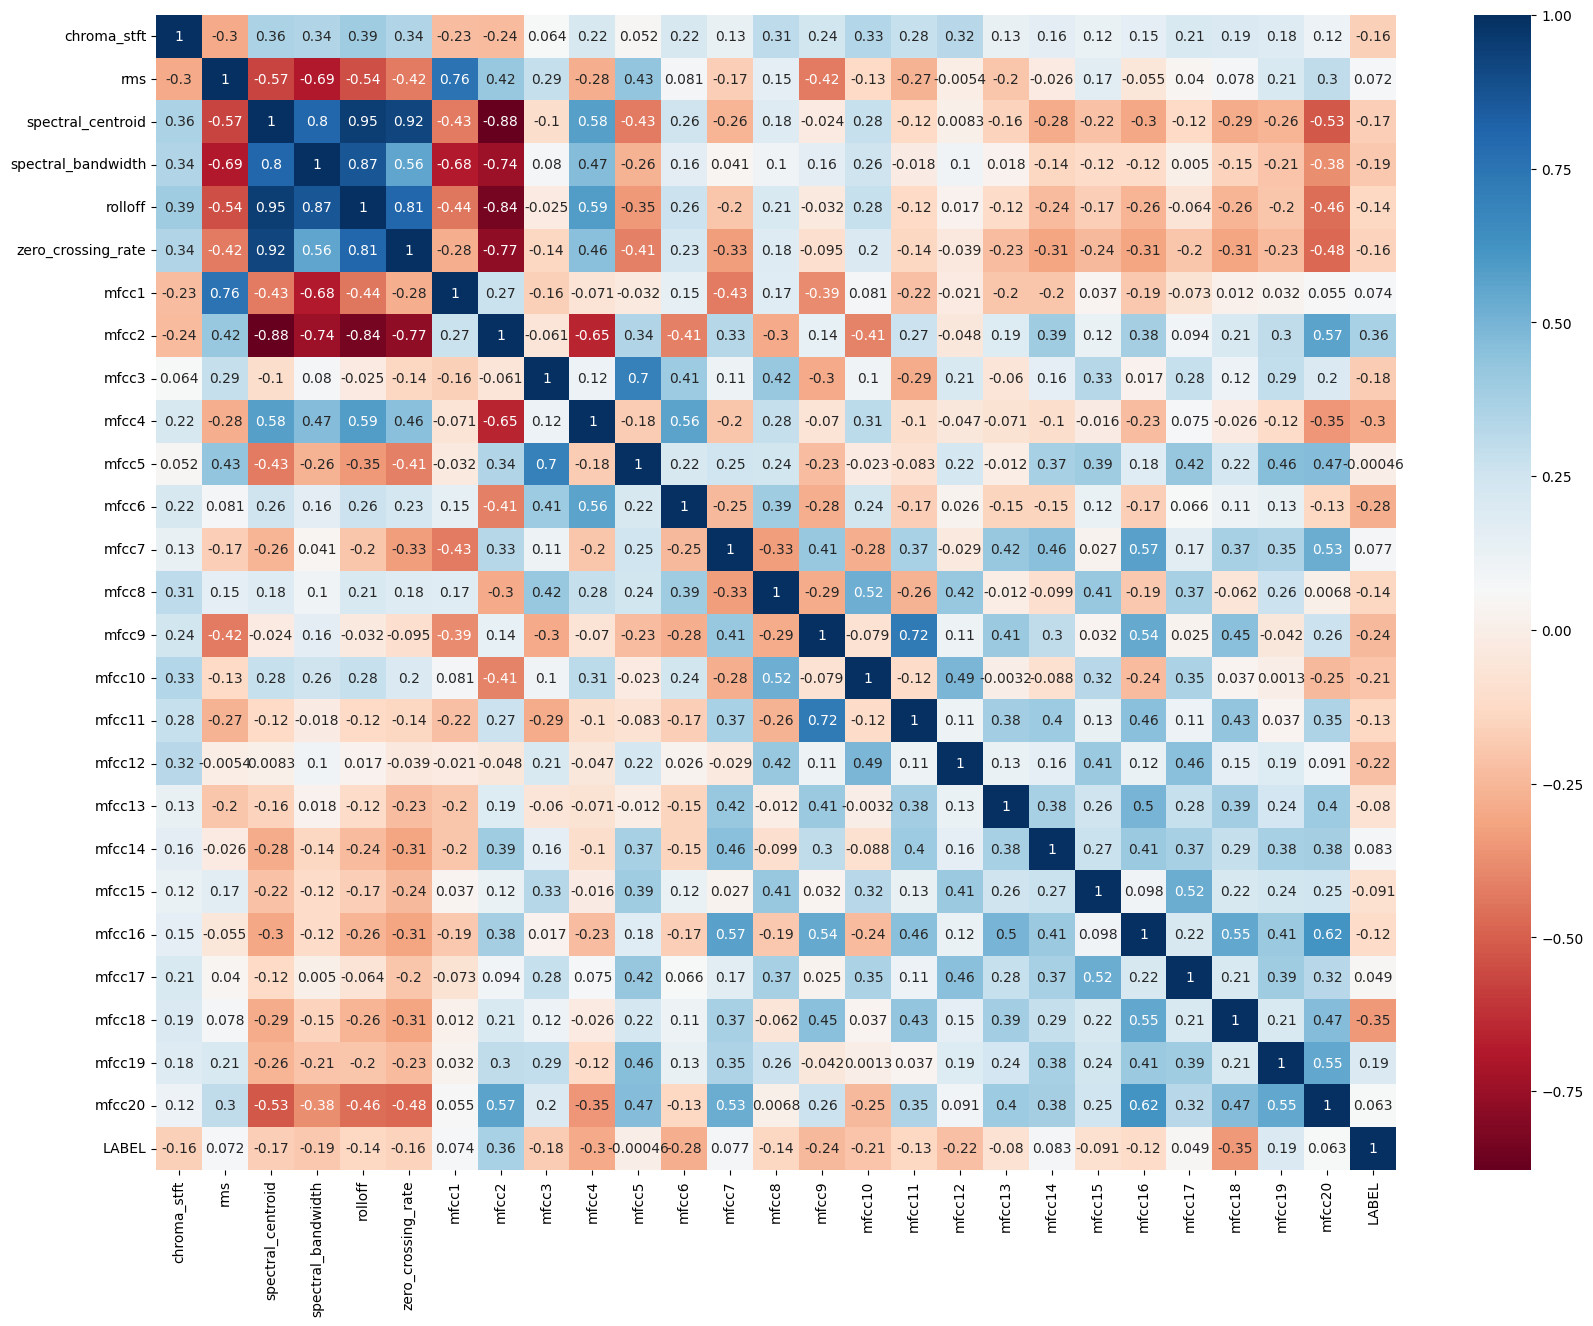

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='RdBu',annot=True)

plt.show()

In [9]:
data.drop(columns=['mfcc4','mfcc18'],inplace=True)
data



,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc5,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,-0.092606,...,-14.181895,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,8.610174,...,0.372541,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,-9.747897,...,-3.099179,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,1.098719,...,1.513633,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,-3.085768,...,11.086248,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,-1.793357,-5.060998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,-23.751667,...,-2.950688,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-4.483765,-3.355975,1
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,39.615837,...,-2.910435,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,2.171270,-1.660128,1
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,-30.417339,...,-17.552000,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-4.405540,-15.869982,1
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,31.465832,...,-7.348275,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,3.811063,3.948419,1


In [10]:
x = data.drop(columns=['LABEL'],axis=1)
y = data.iloc[:,-1]
y


0        0
1        0
2        0
3        0
4        0
        ..
11773    1
11774    1
11775    1
11776    1
11777    1
Name: LABEL, Length: 11778, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_test.shape

(2356, 24)

In [13]:
x_train

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc5,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc19,mfcc20
10631,0.286075,0.046697,2076.712256,2398.669311,3328.249668,0.059329,-340.211365,167.488968,-33.989147,-32.074783,...,-15.185881,-10.139907,-12.592799,-7.208086,-8.970437,-0.978217,-1.293339,-6.263407,-0.488368,-2.799343
11002,0.467255,0.015753,1755.360847,1952.712628,2769.739029,0.048501,-408.864532,216.573746,-101.704185,-30.101507,...,-5.655286,12.305911,3.752872,0.483625,-2.571270,-0.578475,5.563003,-2.444832,-4.068725,-6.225821
11574,0.543270,0.002164,2564.979156,3765.370561,3626.080452,0.061165,-529.106445,180.419693,-61.031509,-3.076165,...,-9.845446,9.071465,1.450751,1.779799,4.810153,-5.985565,2.110064,-4.479970,-1.046865,-2.645234
9470,0.405761,0.066368,1220.019282,1676.036351,2250.157492,0.036635,-336.490417,184.846771,1.122585,32.057877,...,-14.950093,-3.420128,-7.184310,-4.469834,0.237137,-1.501580,0.610722,0.267600,2.147634,4.023556
8387,0.398216,0.005265,2533.938902,3487.235488,4303.773271,0.053475,-499.176025,169.322052,-46.050884,-9.994329,...,-11.240803,4.398522,1.448393,6.753747,4.373409,-0.556701,0.052940,-1.804718,-2.402696,-1.283971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0.511273,0.007911,4411.726402,3915.516547,7983.217237,0.147204,-493.266205,103.378525,-21.986046,-22.902689,...,-19.808729,5.036044,-13.260745,0.080384,-3.997434,-13.673032,-0.065063,-8.697081,-7.467721,-9.974241
3264,0.368155,0.076629,4113.681255,3093.268734,7038.121218,0.121026,-272.683563,74.327026,-29.647827,-12.373886,...,-10.425572,-10.983247,-13.371203,-8.080920,-5.525911,-6.471640,-11.825028,-2.608881,-12.091727,-8.064198
9845,0.459072,0.049750,2874.275656,2657.510381,4954.163896,0.082571,-281.824921,158.795334,-75.600906,-12.657750,...,-25.430965,0.180302,-6.667664,-6.415062,-8.867996,-10.002553,-1.927851,-12.356460,-0.011989,-11.337104
10799,0.467578,0.024265,3179.959644,2811.535681,5561.419548,0.095072,-340.712524,148.016556,-88.856789,-37.050705,...,-18.931517,4.879707,-16.217760,-1.722956,-5.181480,-5.514510,-0.247319,-8.318757,-7.549753,-1.802971


In [14]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)



In [15]:
x_train

array([[-1.96799722,  0.31700273, -0.60071652, ..., -0.63454128,
         0.45009686,  0.29519699],
       [ 0.6473806 , -0.78783101, -0.8996166 , ...,  0.19009732,
        -0.27224006, -0.33235807],
       [ 1.74467581, -1.27301669, -0.14656257, ..., -0.24939997,
         0.33742011,  0.32342185],
       ...,
       [ 0.52925699,  0.42600794,  0.14112481, ..., -1.95036374,
         0.54620631, -1.26848301],
       [ 0.65204319, -0.48391604,  0.42545207, ..., -1.07840345,
        -0.97453737,  0.47768124],
       [ 0.70796533, -1.18568398,  0.67097853, ..., -3.789771  ,
        -2.08552282, -1.91542326]])

In [13]:
from sklearn.model_selection import cross_val_predict


In [3]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)


In [16]:
y_scores = cross_val_predict(rf,x_train,y_train,cv=3,method="predict_proba")


In [18]:
from sklearn.metrics import roc_auc_score,roc_curve
y_scores_forest  = y_scores[:,1]
fpr,tpr,threshold = roc_curve(y_train,y_scores_forest)

In [42]:
def plot_roc_curve(fpr, tpr, classifier,y_train,y_probs):
 score = roc_auc_score(y_train,y_probs)
 plt.plot(fpr, tpr, linewidth=2, label=classifier+"(AUC=%0.2f)" % score)
 plt.legend(loc="lower right")
 plt.plot([0, 1], [0, 1], 'k--')

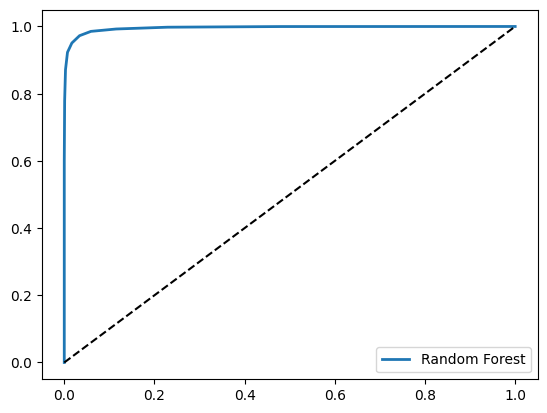

In [21]:
plot_roc_curve(fpr, tpr, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [22]:
print(roc_auc_score(y_train,y_scores_forest))

0.9956409202661879


In [ ]:
rf.fit(x_train,y_train)

In [29]:
y_pred = rf.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))


0.9804753820033956


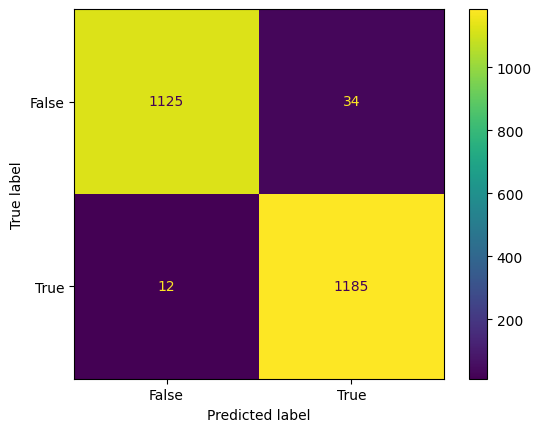

In [31]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [32]:
import librosa as lb

In [33]:
def extract_feature(path):
    y,sr = lb.load(path)
    features = []
    chroma_stft = np.mean(lb.feature.chroma_stft(y=y,sr=sr))
    spct_cent = np.mean(lb.feature.spectral_centroid(y=y,sr=sr))
    spect_band = np.mean(lb.feature.spectral_bandwidth(y=y,sr=sr))
    rollof = np.mean(lb.feature.spectral_rolloff(y=y,sr=sr))
    rms = np.mean(lb.feature.rms(y=y))
    zero_crossing_rate = np.mean(lb.feature.zero_crossing_rate(y=y))
    features.append(chroma_stft)
    features.append(rms)
    features.append(spct_cent)
    features.append(spect_band)
    features.append(rollof)
    features.append(zero_crossing_rate)
    mfccs = lb.feature.mfcc(y=y,sr=sr)
    mfccs = np.delete(mfccs,3,axis=0)
    mfccs = np.delete(mfccs,17,axis=0)
    for mean in np.mean(mfccs,axis=1):
        features.append(mean)
    
    return features
    
    


In [43]:
path = "linus-original-DEMO.mp3/linus-original-DEMO.mp3"
features = extract_feature(path)
features



[0.39570555,
 0.06438,
 1841.3196041948222,
 1838.0560007520717,
 3386.358689818958,
 0.08929726804373066,
 -261.09406,
 119.219925,
 -10.147601,
 12.508324,
 -3.9494388,
 3.5333066,
 -1.3474876,
 -2.8008857,
 6.783764,
 -6.68391,
 1.4926845,
 0.071121596,
 3.3981092,
 1.6101464,
 1.8576202,
 -0.25368068,
 3.2093143,
 -0.6412276]

In [35]:
features

array([[-0.38545327,  0.9483617 , -0.81966338, -1.38649515, -0.73229201,
         0.46036776,  1.52117931, -0.7112811 ,  0.51862167,  0.93110224,
        -0.78956171,  1.134358  ,  0.50321662,  0.30195019,  1.76259062,
        -0.58136566,  0.89368956,  0.33315214,  1.02718096,  0.8502079 ,
         0.61188177,  0.6632864 ,  1.19610417,  0.69045306]])

In [45]:
pred = rf.predict([features])
pred

array([1], dtype=int64)

In [46]:
path = "linus-to-musk-DEMO.mp3/linus-to-musk-DEMO.mp3"
features = extract_feature(path)

pred = rf.predict([features])
pred

array([0], dtype=int64)

In [23]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(max_iter = 1000)

In [19]:
def probability_scores(classifier,method):
    if method=="predict_proba":
        y_score = cross_val_predict(classifier,x_train,y_train,cv=3,method=method)
        y_score_1d = y_score[:,1]
        return y_score_1d
    y_score = cross_val_predict(classifier,x_train,y_train,cv=3,method=method)
    return y_score

In [24]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(max_iter = 1000)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
GB_classifier = GradientBoostingClassifier()

In [26]:
from lightgbm import LGBMClassifier
LGBM_classifier = LGBMClassifier()

In [27]:
from catboost import CatBoostClassifier
CB_classifier = CatBoostClassifier(logging_level='Silent')

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [28]:
from xgboost import XGBClassifier
XGBC_classifier = XGBClassifier()

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
ET_classifier = ExtraTreesClassifier()

In [30]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier()

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(max_iter = 1000)

In [32]:
from sklearn.svm import SVC
kernal_classifier = SVC(kernel = 'rbf',probability=True)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
K_nearest_classifier = KNeighborsClassifier()

In [34]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()

In [35]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()

[LightGBM] [Info] Number of positive: 3113, number of negative: 3168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 6281, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495622 -> initscore=-0.017514
[LightGBM] [Info] Start training from score -0.017514
[LightGBM] [Info] Number of positive: 3113, number of negative: 3168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 6281, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495622 -> initscore=-0.017514
[LightGBM] [Info] Start training from score -0.017514
[LightGBM] [Info] 

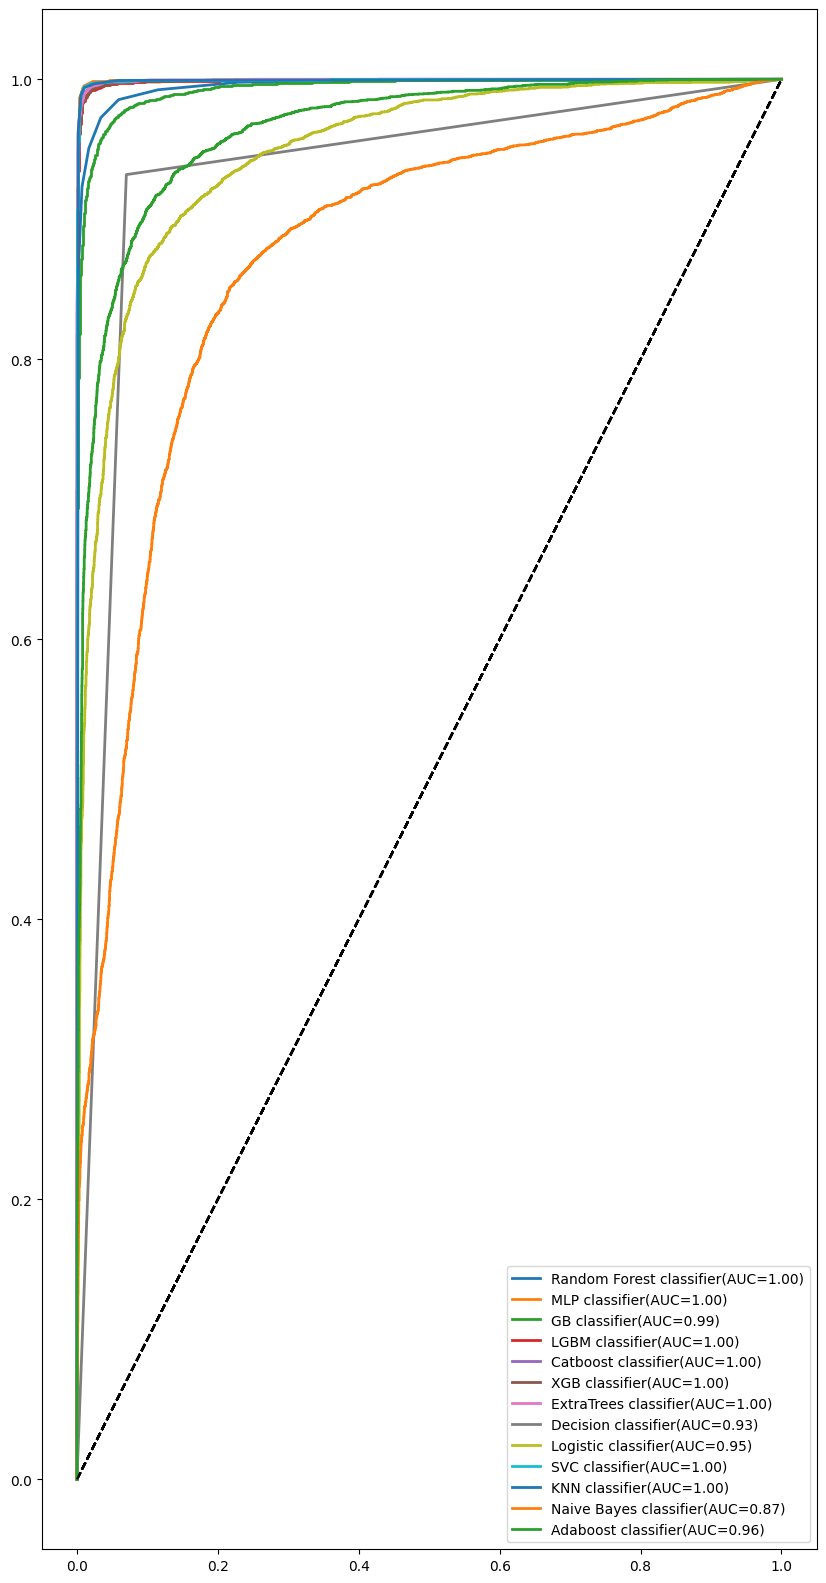

In [34]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure(figsize=(10,20))
prob_score_random_classifier = probability_scores(rf,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_random_classifier)
plot_roc_curve(fpr,tpr,"Random Forest classifier",y_train,prob_score_random_classifier)

prob_score_mlp_classifier = probability_scores(MLP_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_mlp_classifier)
plot_roc_curve(fpr,tpr,"MLP classifier",y_train,prob_score_mlp_classifier)

prob_score_gb_classifier = probability_scores(GB_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_gb_classifier)
plot_roc_curve(fpr,tpr,"GB classifier",y_train,prob_score_gb_classifier)

prob_score_lgbm_classifier = probability_scores(LGBM_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_lgbm_classifier)
plot_roc_curve(fpr,tpr,"LGBM classifier",y_train,prob_score_lgbm_classifier)


prob_score_cb_classifier = probability_scores(CB_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_cb_classifier)
plot_roc_curve(fpr,tpr,"Catboost classifier",y_train,prob_score_cb_classifier)

prob_score_xgb_classifier = probability_scores(XGBC_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_xgb_classifier)
plot_roc_curve(fpr,tpr,"XGB classifier",y_train,prob_score_xgb_classifier)


prob_score_et_classifier = probability_scores(ET_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_et_classifier)
plot_roc_curve(fpr,tpr,"ExtraTrees classifier",y_train,prob_score_et_classifier)


prob_score_decision_classifier = probability_scores(decision_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_decision_classifier)
plot_roc_curve(fpr,tpr,"Decision classifier",y_train,prob_score_decision_classifier)

prob_score_logistic_classifier = probability_scores(logistic_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_logistic_classifier)
plot_roc_curve(fpr,tpr,"Logistic classifier",y_train,prob_score_logistic_classifier)


prob_score_svc_classifier = probability_scores(kernal_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_svc_classifier)
plot_roc_curve(fpr,tpr,"SVC classifier",y_train,prob_score_svc_classifier)


prob_score_knearest_classifier = probability_scores(K_nearest_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_knearest_classifier)
plot_roc_curve(fpr,tpr,"KNN classifier",y_train,prob_score_knearest_classifier)


prob_score_naive_classifier = probability_scores(naive_classifier,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_naive_classifier)
plot_roc_curve(fpr,tpr,"Naive Bayes classifier",y_train,prob_score_naive_classifier)


prob_score_adaboost_classifier = probability_scores(adaboost,"predict_proba")
fpr,tpr,threshold = roc_curve(y_train,prob_score_adaboost_classifier)
plot_roc_curve(fpr,tpr,"Adaboost classifier",y_train,prob_score_adaboost_classifier)

plt.show()

In [22]:
from sklearn.metrics import roc_curve,roc_auc_score

[LightGBM] [Info] Number of positive: 4670, number of negative: 4752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 9422, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495648 -> initscore=-0.017407
[LightGBM] [Info] Start training from score -0.017407


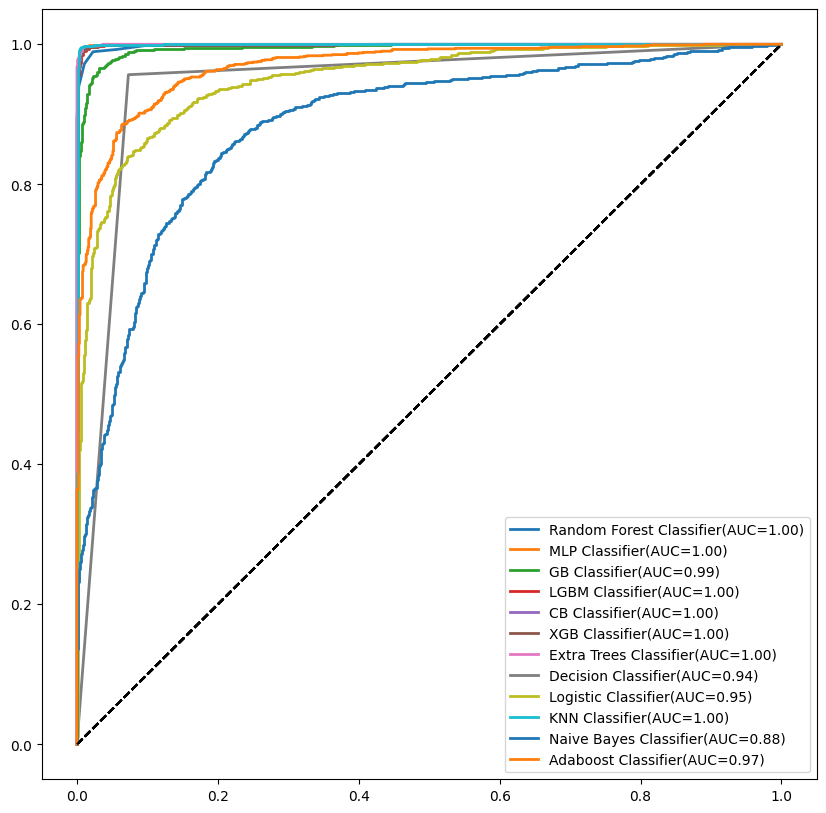

In [43]:
plt.figure(figsize=(10,10))
rf.fit(x_train,y_train)
y_probs_test = rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Random Forest Classifier",y_test,y_probs_test)

MLP_classifier.fit(x_train,y_train)
y_probs_test = MLP_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"MLP Classifier",y_test,y_probs_test)

GB_classifier.fit(x_train,y_train)
y_probs_test = GB_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"GB Classifier",y_test,y_probs_test)

LGBM_classifier.fit(x_train,y_train)
y_probs_test = LGBM_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"LGBM Classifier",y_test,y_probs_test)

CB_classifier.fit(x_train,y_train)
y_probs_test = CB_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"CB Classifier",y_test,y_probs_test)

XGBC_classifier.fit(x_train,y_train)
y_probs_test = XGBC_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"XGB Classifier",y_test,y_probs_test)

ET_classifier.fit(x_train,y_train)
y_probs_test = ET_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Extra Trees Classifier",y_test,y_probs_test)

decision_classifier.fit(x_train,y_train)
y_probs_test = decision_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Decision Classifier",y_test,y_probs_test)

logistic_classifier.fit(x_train,y_train)
y_probs_test = logistic_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Logistic Classifier",y_test,y_probs_test)

kernal_classifier.fit(x_train,y_train)
y_probs_test = kernal_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"KNN Classifier",y_test,y_probs_test)

naive_classifier.fit(x_train,y_train)
y_probs_test = naive_classifier.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Naive Bayes Classifier",y_test,y_probs_test)

adaboost.fit(x_train,y_train)
y_probs_test = adaboost.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Adaboost Classifier",y_test,y_probs_test)


plt.show()